# Lecture 1: Introduction to Machine Learning

In this lecture, we will introduce the basics of machine learning.

Let's start by exploring what neural network training looks like under the hood.

## Part 1: Backpropagation

Backpropagation algorithm is the cornerstone of training neural networks. (used in all neural nets) It is a method to calculate the gradient of the loss function with respect to the weights of the network.

**The main problem is... how do computers compute the gradient?**

Humans get the gradient by calculating the derivative, then plug in the values.

Computers can't do that:
1. Derivatives are hard to calculate
2. Neural networks are huge

Let's build our own backpropagation algorithm from scratch step by step.



In [ ]:
# Importing libraries
import math
import random
import numpy as np
import matplotlib.pyplot as plt

### Manual Gradient Calculation

Let's manually calculate the gradient of a function.

#### Example 1: Single Variable Function

In [ ]:
# Define a random function
def f(x):
    ################################################################################
    # TODO:                                                                        #
    # f(x) = 3x^2 - 4x + 5                                                         #
    ################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    out = 3*x*x - 4*x + 5
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return out

In [3]:
f(2)  # f(2) = 3*2^2 - 4*2 + 5 = 9

9

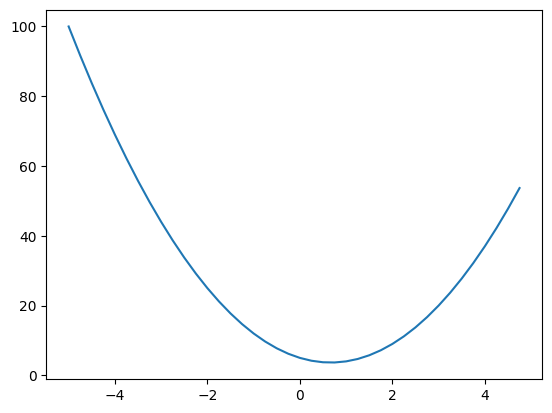

In [4]:
# Plot the function
xs = np.arange(-5, 5, 0.25)  # np.arrange(start, stop, step)
ys = [f(x) for x in xs]
plt.plot(xs, ys)

What is the gradient of f(x) at x=2?
- Human's solution:
    - f'(x) = 6x - 4
    - f'(2) = 6*2 - 4 = 8

- Computer's solution:
    - f'(2) = (f(2 + h) - f(2)) / h
        - h: a small number (0.0001)

In [5]:
def gradient(function, x, _h=0.0001):
    ################################################################################
    # TODO:                                                                        #
    ################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    grad = (function(x+_h)-function(x))/_h
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return grad

In [6]:
gradient(f, 2)

8.000300000023941

Let's calculate the gradient of a more complex function.

![(x + y) * z](https://github.com/qorjiwon/LLM101n/blob/master/assets/(x+y)z.png?raw=1)

(Image credit: Stanford CS231n)

#### Example 2: Multi-Variable Function

In [7]:
def f(x, y, z):
    out = (x + y) * z
    return out

In [8]:
f(-2, 5, -4)  # f(-2, 5, -4) = (-2 + 5) * -4 = -12

-12

Let's calculate the gradient of this function

**Goal**:
1. df/dx at x=-2
2. df/dy at y=5
3. df/dz at z=-4

In [9]:
# Get the derivative of f(x, y, z) with respect to x, y, z
h = 0.0001

################################################################################
# TODO:                                                                        #
# Derivative of f with respect to x=2                                          #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
x = -2
y = 5
z = -4
df_dx = (f(x+h, y, z) - f(x, y, z))/h
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
print(f"df/dx: {df_dx}")

################################################################################
# TODO:                                                                        #
# Derivative of f with respect to y=-3                                         #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
df_dy = (f(x, y+h, z) - f(x, y, z))/h
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
print(f"df/dy: {df_dy}")


################################################################################
# TODO:                                                                        #
# Derivative of f with respect to z=10                                         #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
df_dz = (f(x, y, z+h) - f(x, y, z))/h
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
print(f"df/dz: {df_dz}")

df/dx: -3.9999999999906777
df/dy: -3.9999999999906777
df/dz: 3.000000000010772


This time, let's calculate the gradient using the chain rule.


![chain rule](https://github.com/qorjiwon/LLM101n/blob/master/assets/chain_rule.png?raw=1)

(Image credit: Stanford CS231n)

**Chain Rule**:

q = x + y

f = q * z

- df/dx = df/dq * dq/dx
- df/dy = df/dq * dq/dy

In [10]:
# Get the derivative of f(x, y, z) with respect to x, y using the chain rule

# Redefine the function f(x, y, z) and q(x, y)
def f(q, z):
    ################################################################################
    # TODO:                                                                        #
    ################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    out = q * z
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return out

def q(x, y):
    ################################################################################
    # TODO:                                                                        #
    ################################################################################
    # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    out = x + y
    # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
    return out

In [13]:
# q
################################################################################
# TODO:                                                                        #
# Derivative of f with respect to q=-2                                         #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
df_dq = ((f(q(-2, 5) + h, -4) - f(q(-2, 5), -4))/h)
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
print(f"df/dq: {df_dq}")

df/dq: -4.000000000008441


In [15]:
# x
################################################################################
# TODO:                                                                        #
# Derivative of q with respect to x=-2                                         #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
dq_dx = (q(-2+h, 5) - q(-2, 5))/h
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
print(f"dq/dx: {dq_dx}")

################################################################################
# TODO:                                                                        #
# Derivative of f with respect to x=-2                                         #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
df_dx = df_dq * dq_dx
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
print(f"df/dx: {df_dx}")

dq/dx: 0.9999999999976694
df/dx: -3.999999999999119


In [16]:
# y
################################################################################
# TODO:                                                                        #
# Derivative of q with respect to y=5                                          #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
dq_dy = (q(-2, 5+h) - q(-2, 5))/h
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
print(f"dq/dy: {dq_dy}")


################################################################################
# TODO:                                                                        #
# Derivative of f with respect to y=5                                          #
################################################################################
# *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
df_dy = df_dq * dq_dy
# *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
print(f"df/dy: {df_dy}")

dq/dy: 0.9999999999976694
df/dy: -3.999999999999119


### Custom Auto-Grad Engine

Neural networks are a series of functions that are composed together. Each function is a layer in the network. To get the gradient, we need to calculate the derivative of each function using the chain rule.

**Let's make a custom tensor object that calculates and stores the gradient of the tensor.**
1. Support basic operations: addition, multiplication, tanh, power
2. Calculate and store the gradient of the tensor

- Why not use numpy arrays?:
    - We need to keep track of the operations and tensors that lead to this tensor in order to calculate the gradient.

- Numerical vs Analytical
    - Numerical differentiation: estimates the gradient using the finite difference approximation
        -  f'(x) = (f(x + h) - f(x)) / h
        - Slow
        - Precision issues
    - Analytical differentiation: derives the function symbolically using the chain rule
        - Fast
        - Precise
        - Need to code the derivative of every operation

In [33]:
# Example usage
# a = Tensor(-2.0)
# b = Tensor(5.0)
# c = Tensor(-4.0)
# f = (a + b) * c
# f.backward()

# print(f"a: {a}")               # a: tensor=(-2.0)
# print(f"output: {f}")          # output: tensor=12.0
# print(f"df/da: {a.gradient}")  # df/da: 1.0
# print(f"df/db: {b.gradient}")  # df/db: 1.0
# print(f"df/dc: {c.gradient}")  # df/dc: 3.0

#### Tensor version 1

A simple tensor object that supports addition and multiplication.

In [48]:
class TensorV1:
    def __init__(self, data):
        self.data = data

    # method to print the tensor
    def __repr__(self):
        return f"tensorV1=({self.data})"

    # method to add two tensors
    def __add__(self, other):  # self + other
        ################################################################################
        # TODO:                                                                        #
        # Implement the addition operation.                                            #
        ################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        output = TensorV1(self.data + other.data)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return output

    # method to multiply two tensors
    def __mul__(self, other):  # self * other
        ################################################################################
        # TODO:                                                                        #
        # Implement the multiplication operation.                                      #
        ################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        output = TensorV1(self.data * other.data)
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return output

In [49]:
# Example usage
a = TensorV1(-2.0)
b = TensorV1(5.0)
c = TensorV1(-4.0)
f = (a + b) * c

print(f"a: {a}")
print(f"output: {f}")

a: tensorV1=(-2.0)
output: tensorV1=(-12.0)


1️⃣ 역전파(backpropagation)

우리는 신경망의 학습 과정에서 손실 함수(loss) 를 줄이는 방향으로 가중치(weight)를 업데이트해야한다.
이를 위해서는 각 변수(텐서)의 기울기(gradient, 미분값) 를 알아야 하고,
이 **기울기를 구하는 과정**이 바로 **역전파(backpropagation)**.

2️⃣ 덧셈 연산의 역전파
우리가 덧셈을 수행할 때:

𝑐 = 𝑎 + 𝑏
라고 하면, c의 변화량(output.gradient)이 a와 b에 어떻게 영향을 미치는지 생각해보자.

c가 조금 증가하면 a도 똑같이 증가하고, b도 똑같이 증가할 것이다.
즉, a에 대한 c의 변화율은 1, b에 대한 c의 변화율도 1이다.
수식으로 보면:

𝑑𝑐/𝑑𝑎 = 1, 𝑑𝑐/𝑑𝑏 = 1

이제 손실 𝐿 에 대한 미분을 생각해 보면:

𝑑𝐿𝑑𝑎 = 𝑑𝐿/𝑑𝑐 ⋅ 𝑑𝑐/𝑑𝑎 = output.gradient×1

𝑑𝐿𝑑𝑏 = 𝑑𝐿/𝑑𝑐 ⋅ 𝑑𝑐/𝑑𝑏 = output.gradient×1

즉, c.gradient가 a와 b의 gradient로 그대로 전달돼야한다.
그래서 += output.gradient * 1을 하는 것


#### Tensor version 2

In [47]:
class TensorV2:
    def __init__(self, data, _children=(), _operation=''):
        self.data = data
        self._prev = set(_children)  # _children: tensors that lead to this tensor (ex: 2 * 3 = 6, 2 and 3 are children of 6)
        self.gradient = 0
        self._backward = lambda: None

    def __repr__(self):
        return f"tensorV2=({self.data})"

    def __add__(self, other):  # self + other
        output = TensorV2(self.data + other.data, (self, other))
        def _backward():
            ################################################################################
            # TODO:                                                                        #
            # Implement the backward pass for addition.                                    #
            # hint: use the chain rule (df/dx = df/dq * dq/dx, q = x + y)                  #
            # df/dq -> output.gradient                                                     #
            ################################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            self.gradient += output.gradient * 1
            other.gradient = output.gradient * 1
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        output._backward = _backward
        return output

    def __mul__(self, other):  # self * other
        output = TensorV2(self.data * other.data, (self, other))
        def _backward():
            ################################################################################
            # TODO:                                                                        #
            # Implement the backward pass for multiplication.                              #
            # hint: use the chain rule (df/dx = df/dq * dq/dx, q = x * y)                  #
            # df/dq -> output.gradient                                                     #
            ################################################################################
            # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
            self.gradient += output.gradient * other.data
            other.gradient = output.gradient * self.data
            # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        output._backward = _backward
        return output

    # method to calculate the gradient
    # Goes through the graph in reverse topological order and calculate the gradient
    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.gradient = 1
        for node in reversed(topo):
            node._backward()

In [50]:
# Example usage
a = TensorV2(-2.0)
b = TensorV2(5.0)
c = TensorV2(-4.0)
f = (a + b) * c
f.backward()

print(f"a: {a}")
print(f"output: {f}")
print(f"df/da: {a.gradient}")
print(f"df/db: {b.gradient}")
print(f"df/dc: {c.gradient}")

a: tensorV2=(-2.0)
output: tensorV2=(-12.0)
df/da: -4.0
df/db: -4.0
df/dc: 3.0


#### Tensor final version

In [42]:
class Tensor:
    def __init__(self, data, _children=(), _operation='', label=''):
        self.data = data
        self._prev = set(_children)
        self.gradient = 0
        self._backward = lambda: None
        # for visualization
        self._operation = _operation  # _operation: operation that lead to this tensor (ex: 2 * 3 = 6, * is the operation)
        self.label = label  # label: name of the tensor

    def __repr__(self):
        return f"tensor=({self.data})"

    def __add__(self, other):  # self + other
        output = Tensor(self.data + other.data, (self, other), '+')
        def _backward():
            self.gradient += 1 * output.gradient
            other.gradient += 1 * output.gradient
        output._backward = _backward
        return output

    def __mul__(self, other):  # self * other
        output = Tensor(self.data * other.data, (self, other), '*')
        def _backward():
            self.gradient += other.data * output.gradient
            other.gradient += self.data * output.gradient
        output._backward = _backward
        return output

    # Activation function
    def tanh(self):  # tanh(self)
        ################################################################################
        # TODO:                                                                        #
        # Implement the tanh operation.                                                #
        # hint: use math.tanh                                                          #
        ################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        output = Tensor(math.tanh(self.data))
        def _backward():
          self.gradient += ( math.sech(self.data) ** 2 ) * output.gradient
        output._backward += _backward
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return output

    def __pow__(self, power):  # self ** power
        assert isinstance(power, (int, float)), "Power must be an int or a float"
        ################################################################################
        # TODO:                                                                        #
        # Implement the power operation.                                               #
        ################################################################################
        # *****START OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        output = Tensor(self.data ** power)
        def _backward():
          self.gradient += power * (self.data ** (power - 1)) * output.gradient
        output.backward += _backward
        # *****END OF YOUR CODE (DO NOT DELETE/MODIFY THIS LINE)*****
        return output

    def backward(self):
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        self.gradient = 1
        for node in reversed(topo):
            node._backward()

    def __neg__(self): # -self
        return self * Tensor(-1.0)

    def __sub__(self, other): # self - other
        return self + (-other)

In [51]:
# Example usage
a = Tensor(-2.0, label='a')
b = Tensor(5.0, label='b')
c = Tensor(-4.0, label='c')

ab = a + b; ab.label = 'a + b'
f = ab * c; f.label = 'f'

f.backward()

print(f"a: {a}")
print(f"output: {f}")
print(f"df/da: {a.gradient}")
print(f"df/db: {b.gradient}")
print(f"df/dc: {c.gradient}")

a: tensor=(-2.0)
output: tensor=(-12.0)
df/da: -4.0
df/db: -4.0
df/dc: 3.0


In [ ]:
def trace(root):
    # builds a set of all nodes and edges in a graph
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root):
    from graphviz import Digraph
    dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
    nodes, edges = trace(root)
    for n in nodes:
        uid = str(id(n))
        # for any value in the graph, create a rectangular ('record') node for it
        dot.node(name = uid, label = "{ %s | data %.4f | grad %.4f }" % (n.label, n.data, n.gradient), shape='record')
        if n._operation:
            # if this value is a result of some operation, create an op node for it
            dot.node(name = uid + n._operation, label=n._operation)
            # and connect this node to it
            dot.edge(uid + n._operation, uid)
    for n1, n2 in edges:
        # connect n1 to the op node of n2
        dot.edge(str(id(n1)), str(id(n2)) + n2._operation)
    return dot

In [ ]:
# Draw the graph
draw_dot(f)

# If there is a problem with displaying the graph, run the following command in the terminal (Linux only)
# sudo apt-get install graphviz

Now let's move on to a simple neural network.

In [ ]:
# Input values
x1 = Tensor(2.0, label='x1')
x2 = Tensor(3.0, label='x2')

# Weights
w1 = Tensor(-3.0, label='w1')
w2 = Tensor(1.0, label='w2')

# bias
b = Tensor(6.0, label='b')

# y = tanh(Wx + b) = tanh(w1*x1 + w2*x2 + b)
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
y = x1w1x2w2 + b
y = y.tanh(); y.label = 'y'

In [ ]:
# Calculate the gradient of y with respect to w1, w2, and b
y.backward()
print(f"y: {y.data}")
print(f"dy/dw1: {w1.gradient}")
print(f"dy/dw2: {w2.gradient}")
print(f"dy/db: {b.gradient}")

In [ ]:
# Draw the graph
draw_dot(y)

### PyTorch Tensor

PyTorch is a popular deep learning library that provides a tensor object similar to the one we've implemented.

Let's implement the same example using PyTorch tensors.

In [ ]:
import torch
# Implement PyTorch tensor
x1 = torch.tensor(2.0, requires_grad=False)
x2 = torch.tensor(3.0, requires_grad=False)
w1 = torch.tensor(-3.0, requires_grad=True)
w2 = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(6.0, requires_grad=True)
y = torch.tanh(w1 * x1 + w2 * x2 + b)

# Calculate the gradient of y with respect to w1, w2, and b
print(f"y: {y.data.item()}")
y.backward()
print(f"dy/dw1: {w1.grad.item()}")
print(f"dy/dw2: {w2.grad.item()}")
print(f"dy/db: {b.grad.item()}")

## Part 2: Linear Regression

Linear regression is a simple machine learning model that predicts the relationship between two variables.

Let's implement a simple linear regression model using our custom tensor object. Then, we will train the model using the backpropagation algorithm.

### Model



In [ ]:
# Linear network
class Linear:
    def __init__(self, input_size):
        # y = Wx + b
        self.weights = [Tensor(random.uniform(-1, 1)) for _ in range(input_size)]  # (input_size)
        self.bias = Tensor(random.uniform(-1, 1))  # (1)

    def __call__(self, x):
        """
        Forward pass
        y = Wx + b
        """
        x = sum((wi * xi for wi, xi in zip(self.weights, x)), self.bias)  # matrix multiplication by summing the products
        # note: Dot product is not good for parallelization
        return x

    def parameters(self):
        return self.weights + [self.bias]

In [ ]:
# Input values
x = [Tensor(-2.0), Tensor(5.0), Tensor(-4.0), Tensor(1.0)]

# Target value
y = Tensor(-5.0)

# Initialize the linear network
model = Linear(input_size=4)

# Example forward pass
print(f"Output: {model(x)}")

### Training

Training a neural network involves the following steps:
1. Forward pass: Calculate the predicted value.
2. Loss: Calculate the difference between the predicted value and the target value.
3. Backward pass: Calculate the gradient of the loss with respect to the weights.
4. Update weights: Update the weights using the gradients.

Repeat the process until the loss is minimized.

Let's implement a simple training loop for the linear regression model.


In [ ]:
lr = 0.01  # Learning rate

# Training loop
for step in range(10):
    # Forward pass
    logits = model(x)

    # Loss
    loss = (logits - y) ** 2  # MSE loss

    # Backward pass
    for param in model.parameters():
        param.gradient = 0  # Zero the gradients
    loss.backward()

    # Update weights
    for param in model.parameters():
        param.data = param.data - lr * param.gradient

    print(f"Step {step+1}, Loss: {loss.data}")